# USA Flights Performance in 2008
## by Manal Al-Jadaan

## Preliminary Wrangling

Flight dataset consists of flight arrival and departure details for all commercial flights within the USA for year 2008. it has been provided by Bureau of Transportation Statistics (BTS) website where all the fields have been explained in details. Bureau of Transportation Statistics (BTS) tracks the on-time performance of domestic flights operated by large air carriers.

Dataset Download Page: http://stat-computing.org/dataexpo/2009/the-data.html
Field Description Page: https://www.transtats.bts.gov/Fields.asp?Table_ID=236


We will analyze the flights performance in year 2008 and investigate the reseons behind the delay and cancellation of the flights in that year.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
# Load 2008 dataset
df_2008=pd.read_csv('2008.csv')

In [3]:
# Explore the dataset fields
df_2008.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


In [4]:
# Check the properties of dataframe's fields in terms of datatype, names of columns, and number of rows and columns 
df_2008.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 29 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               float64
TaxiOut              float64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtypes: float64(14), int64(10), object(5)
memory usage: 1.5+ GB


In [5]:
#check for null values for each field
df_2008.isnull().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime               136246
CRSDepTime                 0
ArrTime               151649
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                83365
ActualElapsedTime     154699
CRSElapsedTime           844
AirTime               154699
ArrDelay              154699
DepDelay              136246
Origin                     0
Dest                       0
Distance                   0
TaxiIn                151649
TaxiOut               137058
Cancelled                  0
CancellationCode     6872294
Diverted                   0
CarrierDelay         5484993
WeatherDelay         5484993
NASDelay             5484993
SecurityDelay        5484993
LateAircraftDelay    5484993
dtype: int64

### What is the structure of your dataset?

> the dataset contains of 29 columns, and 7009728 rows (in maximum). Some columns contains null values due to the nature of the provided data where it divided to delay flights, cancelled flights, and on time flights. So, any column that not related to at least one of the mentioned categories will contains nulls. The data is fine to my analysis. 

### What is/are the main feature(s) of interest in your dataset?

> the main features that cause flights' delay or cancellation such as (departure and arrival delay time, whether the flight cancelled, and what are the cancellation and delay reasons. These features will be analyzed to discover the relationship between some features that affect on the flights performance.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I will study the mentioned main features of interest against carriers, destination airports, origin airports to come up with some insights about the flights performance of USA in 2008.

## Univariate Exploration

> In this section, I will investigate distributions of individual variables. it Will provide plot and observation for each analyzed variable. 

### What is the main reason for cancellation?

I want to check the main reason for cancellation in 2008 between cancellatione reasons (A = carrier, B = weather, C = NAS, D = security): 

Text(0.5, 1.0, 'Main Reason for Cancellations in 2008')

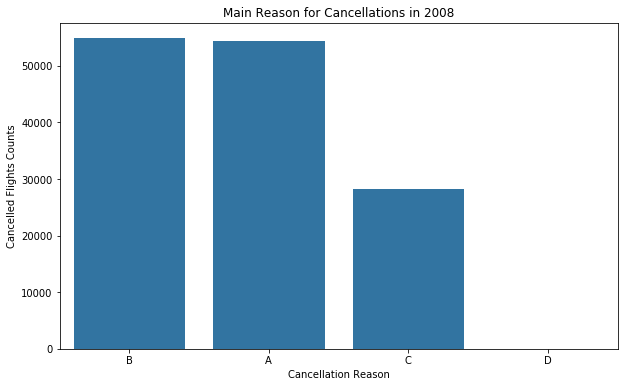

In [83]:
# set the order and color of the plot
order=df_2008.CancellationCode.value_counts()
base_color = sb.color_palette()[0]
plt.figure(figsize = [10, 6])
sb.countplot(data=df_2008, x='CancellationCode', color=base_color, order=order.index)
plt.xlabel('Cancellation Reason')
plt.ylabel('Cancelled Flights Counts')
plt.title('Main Reason for Cancellations in 2008')

**Observation:**
> the weather is the main cause for flights cancellation in 2008 followed by carrier. Security reason is the lowest which mean that few cancellation happened due to security reason.

### What is the carrier that have high number of cancellation?

Now, Lets check for the carrier that has bad performance in terms of flights cancellation:

In [85]:
# take the cancelled flights only
df_cancelled=df_2008.query('Cancelled==1')

Text(0.5, 1.0, 'Count of Cancelled Flights per Carrier in 2008')

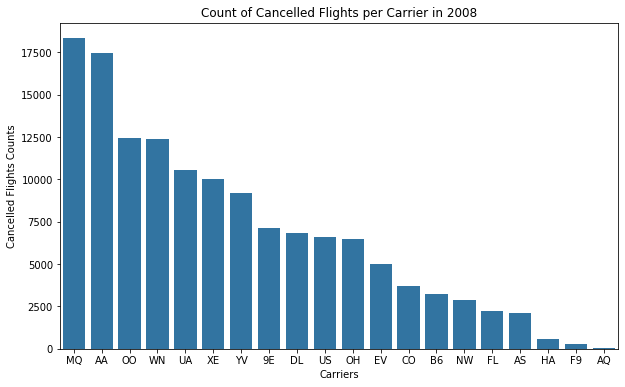

In [87]:
# plot the carriers with thier counts of cancelled flight, specify the order of carriers result on the plot
order=df_cancelled.UniqueCarrier.value_counts()
plt.figure(figsize = [10, 6])
sb.countplot(data = df_cancelled, x = 'UniqueCarrier', color = base_color, order=order.index)
plt.xlabel('Carriers')
plt.ylabel('Cancelled Flights Counts')
plt.title('Count of Cancelled Flights per Carrier in 2008')

**Observation:**
>MQ carrier had the most cancellations in 2008 followed by AA and OO. 

### What is the destination airport that has the high number of cancellations?

Lets see the destination airport that had the most cancelled flights in 2008:

Text(0, 0.5, 'Cancelled Flights Counts')

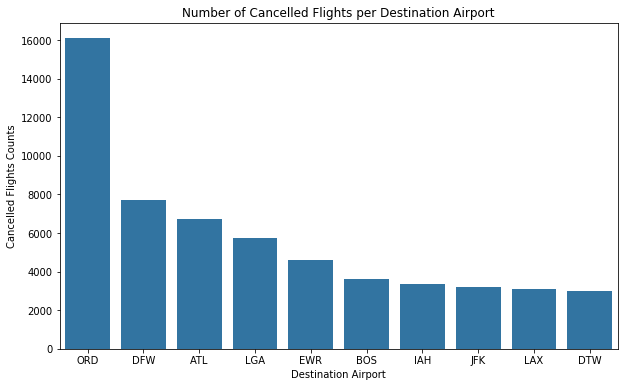

In [88]:
# using the dataframe that conatins the cancelled flights only, specifying the results order and bars color
order=df_cancelled.Dest.value_counts().head(10)
base_color = sb.color_palette()[0]
plt.figure(figsize = [10, 6])
sb.countplot(data = df_cancelled, x = 'Dest', color = base_color, order=order.index)
plt.title('Number of Cancelled Flights per Destination Airport')
plt.xlabel('Destination Airport')
plt.ylabel('Cancelled Flights Counts')

**Observation:**
> Chicago O'Hare International airport (ORD) suffered from flights cancellations where it came in the first place.

### What is the origin that has the high number of cancellation?

Now, Lets chack also the origin airport that had most cancelled flights in 2008:

Text(0, 0.5, 'Cancelled Flights Counts')

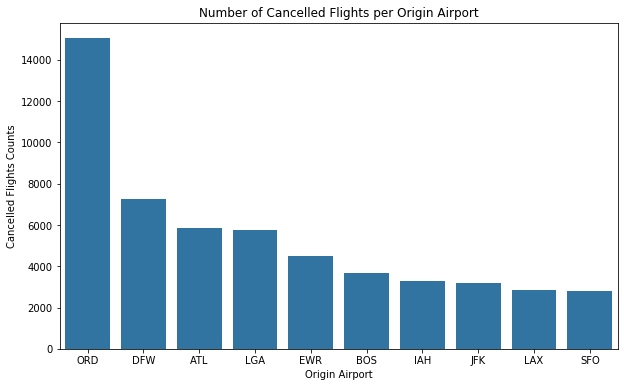

In [89]:
# using the dataframe that conatins the cancelled flights only, specifying the results order and bars color
order=df_cancelled.Origin.value_counts().head(10)
base_color = sb.color_palette()[0]
plt.figure(figsize = [10, 6])
sb.countplot(data = df_cancelled, x = 'Origin', color = base_color, order=order.index)
plt.title('Number of Cancelled Flights per Origin Airport')
plt.xlabel('Origin Airport')
plt.ylabel('Cancelled Flights Counts')

**Observation:**
>surprisingly, ORD airport also had the highest number of cancellation in 2008. This is interesting to investigate the reasons that made ORD airport number 1 in cancellation rate in the next section.

### Which day of week had the most cancellations?

Lets see whether there are specific days had more cancellation such as weekend days:

Text(0, 0.5, 'Cancelled Flights Counts')

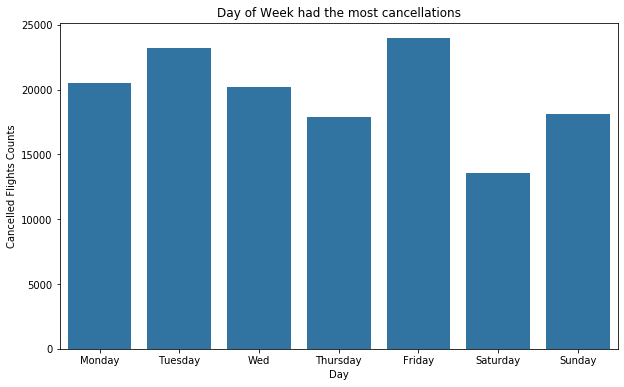

In [107]:
# using the dataframe that conatins the cancelled flights only, specifying the days labels and bars color
plt.figure(figsize = [10, 6])
plot=sb.countplot(data=df_cancelled, x='DayOfWeek', color=base_color )
plot.set_xticklabels(['Monday', 'Tuesday','Wed', 'Thursday','Friday','Saturday', 'Sunday'])
plt.title('Day of Week had the most cancellations')
plt.xlabel('Day')
plt.ylabel('Cancelled Flights Counts')

**Observation:**
> Friday had the most cancellations. This might be due to the starting of weekend holiday. 

### Which Month had the most cancellations?

Lets see which month had most cancellations

Text(0, 0.5, 'Cancelled Flights Counts')

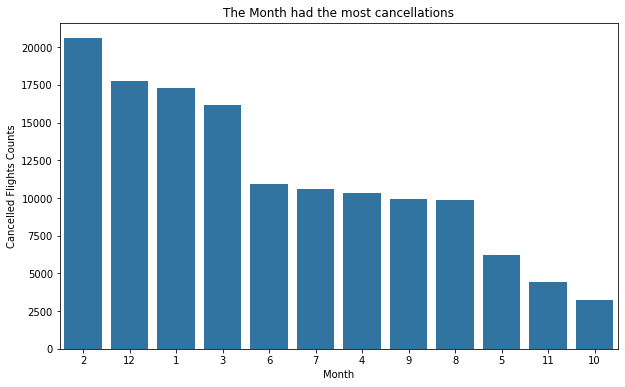

In [109]:
# using the dataframe that conatins the cancelled flights only, specifying the days labels and bars color
plt.figure(figsize = [10, 6])
month_order=df_cancelled.Month.value_counts()
plot=sb.countplot(data=df_cancelled, x='Month', color=base_color, order=month_order.index )
plt.title('The Month had the most cancellations')
plt.xlabel('Month')
plt.ylabel('Cancelled Flights Counts')

**Observation:**
>December, February, and June are the months with high cancellations.

### How is the distribution of delay in arrivals during year 2008?

Lets plot the arrival delay (in minutes) as a histogram to see how the rrival delays was in 2008:

In [94]:
# create dataframe that takes only the flights with delay in arrival
df_arriveDelay=df_2008.query('Cancelled==0 and ArrDelay>0')

As most arrival dealys distributed between 1 and 500, I set the limits of x axis between these values

Text(0, 0.5, 'Count')

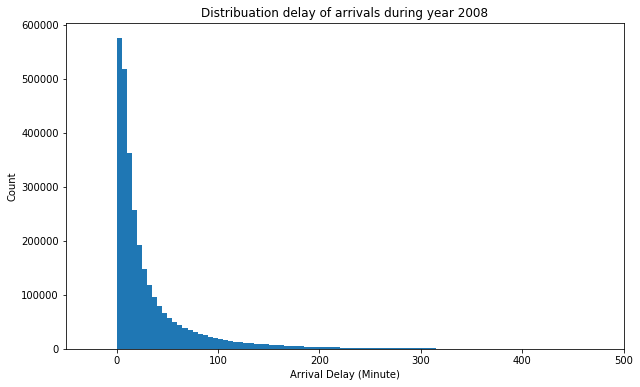

In [99]:
# set the figure size
plt.figure(figsize=(10,6))
# set the bins and create the plot
bins = np.arange(0, 500, 5)
plt.hist(df_arriveDelay['ArrDelay'] , bins=bins )
plt.xlim(-50,500)
plt.title('Distribuation delay of arrivals during year 2008')
plt.xlabel('Arrival Delay (Minute)')
plt.ylabel('Count')

**Observation:**
>The distribution is skewed to the right. the maximum delays occurred between 1 and less than 50 minutes

### What is the maximum delay in departure occurred during year 2008?

Now, lets plot the departure delay (in minutes) as a histogram to see how the departure delays was in 2008:

In [97]:
# create dataframe that takes only the flights with delay in departure
df_departDelay=df_2008.query('Cancelled==0 and DepDelay>0')

As most departue dealys distributed between 1 and 300, I set the limits of x axis between these values

Text(0, 0.5, 'Count')

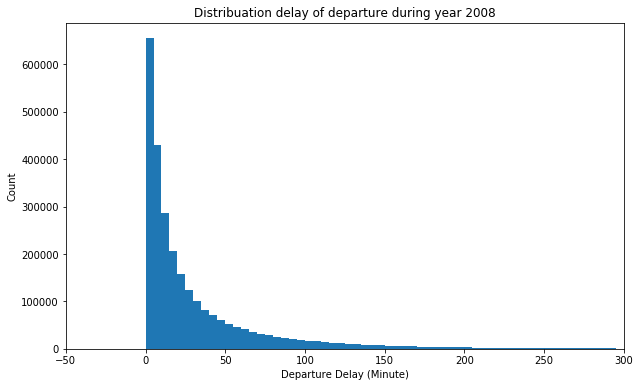

In [100]:
# set the figure size
plt.figure(figsize=(10,6))
# set the bins and create the plot
bins = np.arange(0, 300 ,5)
plt.hist(df_departDelay['DepDelay'] , bins=bins )
plt.xlim(-50,300)
plt.title('Distribuation delay of departure during year 2008')
plt.xlabel('Departure Delay (Minute)')
plt.ylabel('Count')

**Observation:**
>The distribution is skewed to the right. the maximum delays occured between 1 and less than 50 minutes

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I create dataframe contains only cancelled flights (cancelled=1) in order to answer the proposed questions that related to cancellations. Also, I created dataframe contains delayed flights (ArrDelay>0 and DepDelay>0) in order to answer the proposed questions that related to cancellations.
> In the graphs above, I explored cancellation codes to see the main reasons in 2008. I identified the carrier, origin, destination airports which had high cancellations in 2008. Also, I explored the time of the year (Day and Month) the cancellations were the highest. I explored the distribution of delays in departure and arrival and set the limits on x axis to the related values and set the bins as well. 


### Results Summary:
- The weather is the main cause for flights cancellation in 2008 followed by carrier.
- MQ carrier had the most cancellations in 2008 followed by AA and OO.
- Chicago O'Hare International airport (ORD) suffered from flights cancellations where it came in the first place as origin and destination.
- Friday had the most cancellations. This might be due to the starting of weekend holiday.
- December, February, and June are the months with high cancellations.
- The maximum delays occured between 1 and less than 50 minutes

## Bivariate Exploration

> In this section, I will investigate relationships between pairs of variables.

### What are the carriers that have high percentage of flights arrived on time? What are the carriers that have high percentage of flights depart on time? 

Lets see which carriers shown high performance during 2008 and which carriers shown bad performance in 2008 in terms of on time arrival and departure.

In [62]:
# create new dataframe that contains delayed departure of flights. I will use dataframe 'df_arriveDelay' that i created in the previous section and contains uncancelled and delayed arrive flights to calculate the percentage of the delayed flights
ArrvDelay_flights=df_arriveDelay.groupby('UniqueCarrier')['ArrDelay'].count().reset_index(name='delayed_arrive_flights')

In [63]:
# create new dataframe that contains delayed departure of flights. # I will use dataframe 'df_departDelay' that i created in the previous section and contains uncancelled and delayed depart flights to calculate the percentage of the delayed flights
DepartDelay_flights=df_departDelay.groupby('UniqueCarrier')['DepDelay'].count().reset_index(name='delayed_depart_flights')

In [64]:
# calcualte all flights that are not cancelled
all_flights= df_2008.query('Cancelled==0').groupby('UniqueCarrier').size().reset_index(name='flights_count')

In [65]:
# merge the above dataframes
flights_percent=pd.merge(ArrvDelay_flights,  DepartDelay_flights, on= 'UniqueCarrier')
flights_percent=pd.merge(flights_percent,  all_flights, on= 'UniqueCarrier')

In [66]:
#check the new dataframe
flights_percent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 4 columns):
UniqueCarrier             20 non-null object
delayed_arrive_flights    20 non-null int64
delayed_depart_flights    20 non-null int64
flights_count             20 non-null int64
dtypes: int64(3), object(1)
memory usage: 800.0+ bytes


In [67]:
#calculate the percentage of delay arrival and on time arrival flights per carrier             
flights_percent['delay_arrive_percentage']=(flights_percent['delayed_arrive_flights']/flights_percent['flights_count'])*100
flights_percent['onTime_arrive_percentage']=100-flights_percent['delay_arrive_percentage']

In [68]:
#calculate the percentage of delay departuer and on time departure flights per carrier 
flights_percent['delay_depart_percentage']=(flights_percent['delayed_depart_flights']/flights_percent['flights_count'])*100
flights_percent['onTime_depart_percentage']=100-flights_percent['delay_depart_percentage']

In [69]:
# round the percentage to 1 deimal digit
flights_percent['delay_arrive_percentage']=round(flights_percent['delay_arrive_percentage'],1)
flights_percent['onTime_arrive_percentage']=round(flights_percent['onTime_arrive_percentage'],1)
flights_percent['delay_depart_percentage']=round(flights_percent['delay_depart_percentage'],1)
flights_percent['onTime_depart_percentage']=round(flights_percent['onTime_depart_percentage'],1)

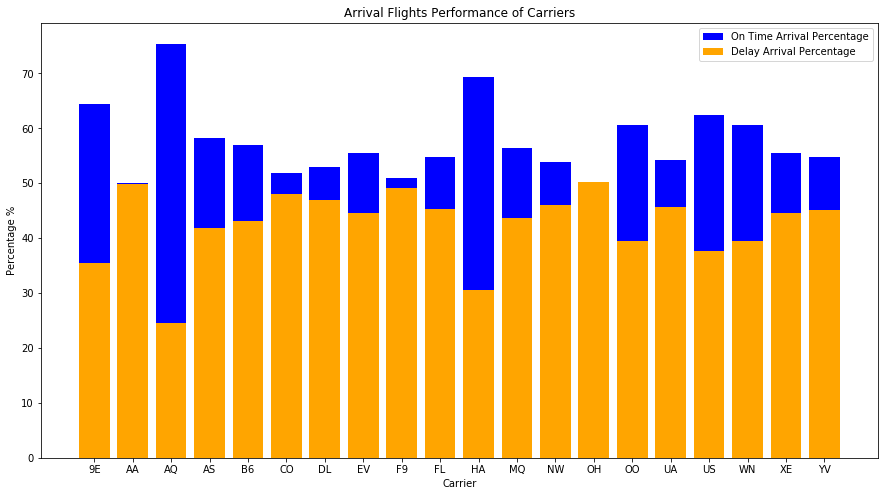

In [72]:
# plot the performance of each carrier in terms of delay arrival percentage and on time arrival percentage
plt.figure(figsize=(15,8))
plt.bar(data = flights_percent, x = 'UniqueCarrier', height = 'onTime_arrive_percentage' , color = 'blue')
plt.bar(data = flights_percent, x = 'UniqueCarrier', height = 'delay_arrive_percentage' , color = 'orange')
orange='Delay Arrival Percentage'
blue='On Time Arrival Percentage'
plt.xlabel('Carrier')
plt.ylabel('Percentage %')
plt.title('Arrival Flights Performance of Carriers')
plt.legend([blue, orange])

**Observation:**
>The blue bar show the percentage of on time arrival percentage per carrier. Obviously, AQ has the best performance among other carriers as it has the highest percentage of flights that arrived on time and lowest percentages of flights delayed in the arrival. It followed by HA and 9E carrieres. The carriers (OH, AA) have the highest percentage of delayed arrival flights.

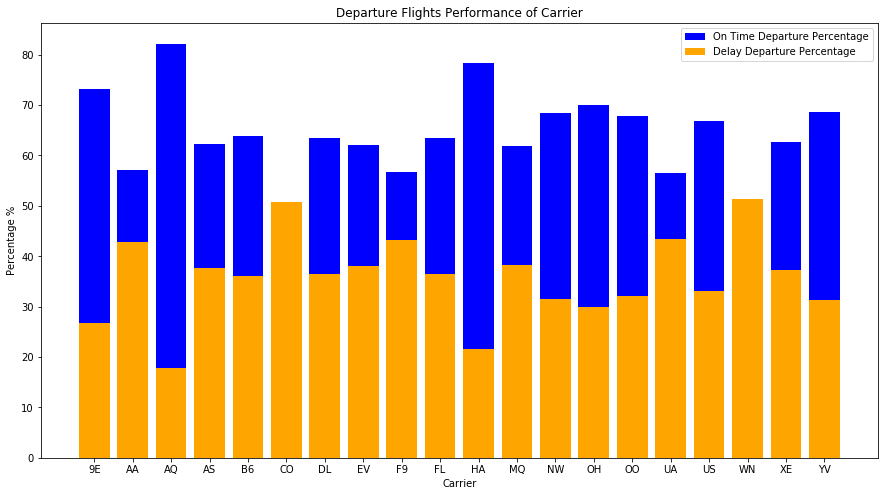

In [73]:
# plot the performance of each carrier in terms of delay departure percentage and on time departure percentage
plt.figure(figsize=(15,8))
plt.bar(data = flights_percent, x = 'UniqueCarrier', height = 'onTime_depart_percentage' , color = 'blue')
plt.bar(data = flights_percent, x = 'UniqueCarrier', height = 'delay_depart_percentage' , color = 'orange')
orange='Delay Departure Percentage'
blue='On Time Departure Percentage'
plt.xlabel('Carrier')
plt.ylabel('Percentage %')
plt.title('Departure Flights Performance of Carrier')
plt.legend([blue, orange])

**Observation:**
>The blue bar show the percentage of on time departure percentage per carrier. Obviously, AQ also has the best performance among other carriers as it has the highest percentage of flights that departure on time and lowest percentages of flights delayed in the depature. It followed by HA and 9E carrieres. the carriers (WN, CO) have the highest percentage of delayed departure flights.

So, (AQ, HA, 9E) are the carriers with high performance in terms of on time arrival and departure.

### How is the relation between delay in the departure with the delay in the arrival?

Lets see if the arrival delay correlated the departure delay positively

Text(0.5, 1.0, 'Relationship between Departure Delay and Arrival Delay')

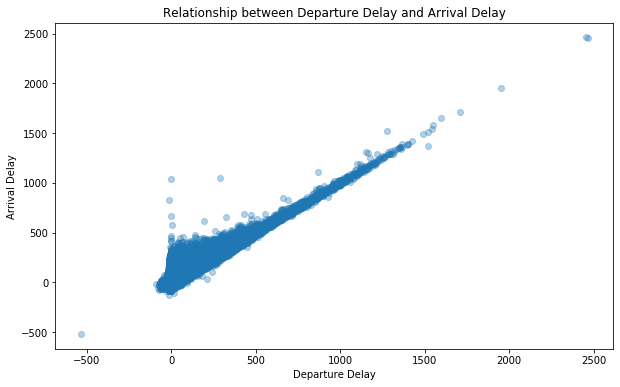

In [75]:
# Exclude the cancelled flights from the data 
df_flights=df_2008.query('Cancelled==0')
plt.figure(figsize=(10,6))
plt.scatter(data=df_flights , x='DepDelay', y='ArrDelay', alpha=1/3)
plt.xlabel('Departure Delay')
plt.ylabel('Arrival Delay')
plt.title('Relationship between Departure Delay and Arrival Delay')

We can see that there is a positive relationship between arrival delay and departure delay where when the departure delays time  increased, the arrival delays time is also increased.

### How is the distribution of Average departure delay among months in 2008?

I will check how the average departure delay ditributed among months in 2008 to come out with months that had highest delay in departure

In [76]:
# create dataframe contains average departure delay per month
depart_delay=df_2008.query('Cancelled==0 and DepDelay>0').groupby('Month')['DepDelay'].mean().reset_index(name='Depart_delay_average')
depart_delay.head()

,Month,Depart_delay_average
0,1,32.918802
1,2,34.397820
2,3,32.363306
3,4,28.798292
4,5,27.884885


Text(0.5, 1.0, 'Distribution of Average Departure Delay Among Months in 2008')

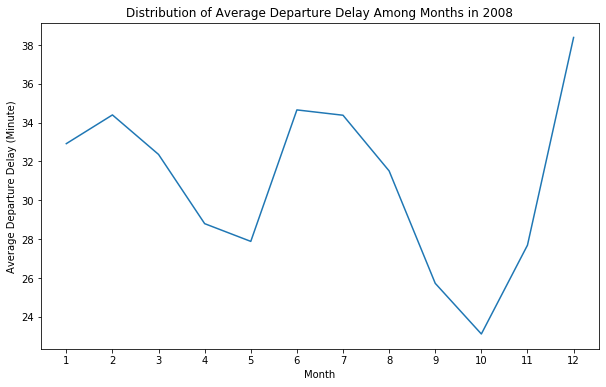

In [77]:
plt.figure(figsize = [10, 6])
base_color = sb.color_palette()[0]
plt.errorbar(data = depart_delay, x = 'Month', y = 'Depart_delay_average', color = base_color)
plt.xticks( depart_delay.Month.index +1 )
plt.xlabel('Month')
plt.ylabel('Average Departure Delay (Minute)')
plt.title('Distribution of Average Departure Delay Among Months in 2008')

**Observation:**
>The line chart shows that the peak of the delay in the departure were in February, June, and December. The whether and holiday might played role in the delay but they are not very related as the delay was variant among winter months and holidays.

### What is the main reasons that made ORD airport come in the first place of cancellation and which month has the most cancellation?

As we see in the previous section that (ORD: Chicago O'Hare International) airport is come in the first place in terms of cancellations as destination and origin airport. Let's analyze the reasons behind that and how these reasons differ from month to other.   


Text(0.5, 1.0, ' The Cancellation Reasons of ORD Airport as Destination for Each Month in 2008')

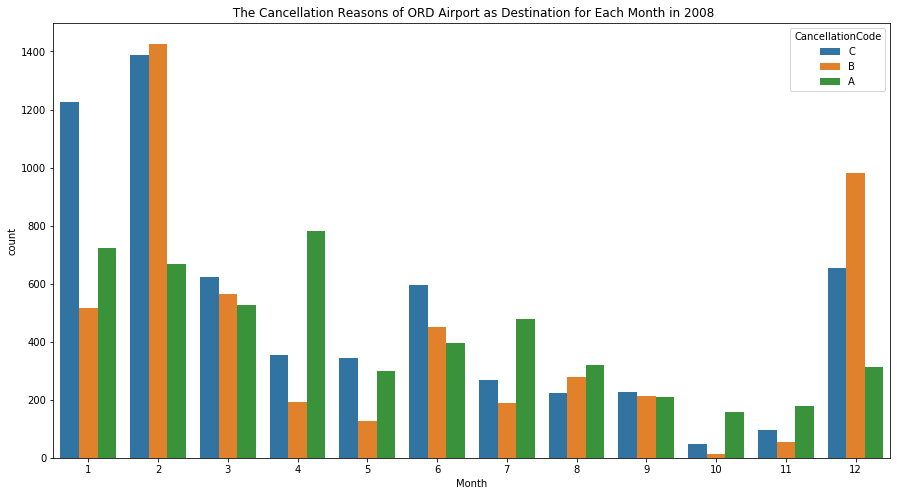

In [79]:
# create dataframe that contains only cancelled flights to the ORD destination and plot it as clustered bar charts to check the cancellation reasons for each month
df=df_2008.query('Cancelled==1 and Dest=="ORD" ')
plt.figure(figsize = [15, 8])
sb.countplot(data = df , x = 'Month', hue = 'CancellationCode' )
plt.title(' The Cancellation Reasons of ORD Airport as Destination for Each Month in 2008')

**Observation:**
>It is clear that February month had the most cancellations and the causes are the (B:weather) first and then (C:National Aviation System (NAS)). October month came as the least month in terms of cancellations. the cancellation reasons for all months were: Weather (B) / National Aviation System (NAS) / Carrier (A) unevenly.

Text(0, 0.5, 'Cancelled Flights Count')

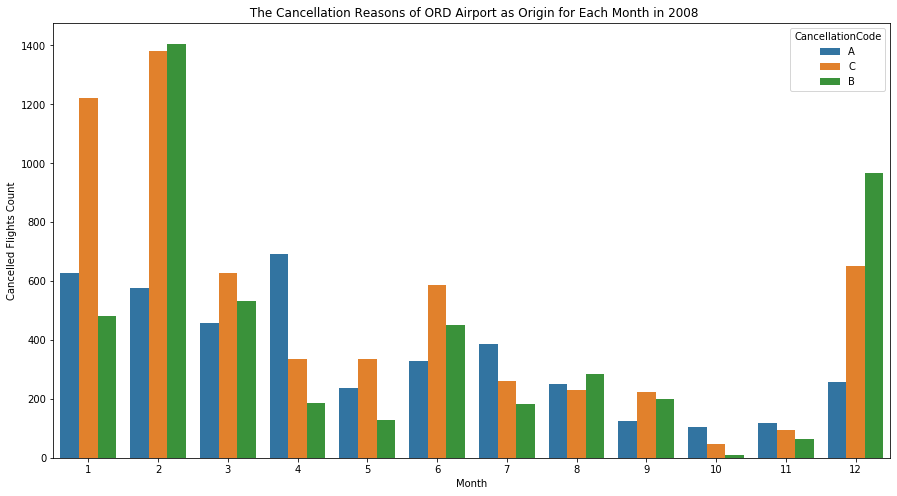

In [80]:
# create dataframe that contains only cancelled flights to the ORD as origin and plot it as clustered bar charts to check the cancellation reasons for each month
df=df_2008.query('Cancelled==1 and Origin=="ORD" ')
plt.figure(figsize = [15, 8])
sb.countplot(data = df , x = 'Month', hue = 'CancellationCode')
plt.title(' The Cancellation Reasons of ORD Airport as Origin for Each Month in 2008')
plt.xlabel('Month')
plt.ylabel('Cancelled Flights Count')

**Observation:**
>It is clear that Februray month also had the most cancellation and the causes are the (B:weather) first and then (C:National Aviation System (NAS)). Also, October month came as the least month in terms of cancellation.

### What are top 5 origin airports with high delay departure average? 

I will check the airports that have highest average departure delay:

In [28]:
# create dataframe contains the average departure delay for non cancelled flights per origin airports
delay_ap=df_2008.query('Cancelled==0 and DepDelay>0 ').groupby( 'Origin')['DepDelay'].mean().reset_index(name='dep_delay_average').sort_values('dep_delay_average', ascending=False).head(5) 

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Top 5 Airports had High Departure Delay in 2008 ')

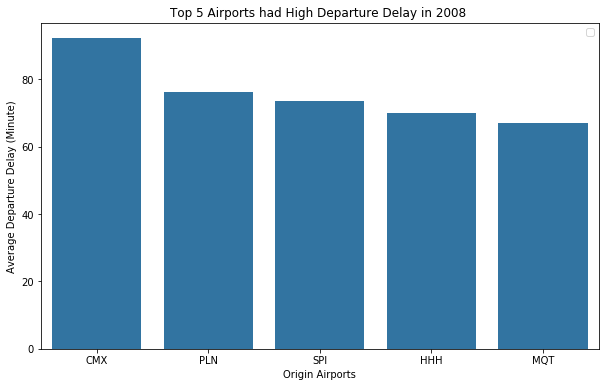

In [29]:
# plot the average departure dela for the top 5 origins
plt.figure(figsize = [10, 6])
base_color = sb.color_palette()[0]
sb.barplot(data = delay_ap, x = 'Origin', y = 'dep_delay_average', color= base_color)
plt.xlabel('Origin Airports')
plt.ylabel('Average Departure Delay (Minute)')
plt.title('Top 5 Airports had High Departure Delay in 2008 ')

**Observation:**
> The following airports had the highest delay in departure in 2008 in order:
- Houghton County Memorial (CMX)
- Pellston Regional  of Emmet County (PLN)
- Capital (SPI)
- Hilton Head (HHH)
- Marquette County Airport (MQT)


### What are top 5 destination airports with high delay arrival average?

will check the airports that have highest average arrival delay:

In [53]:
# create dataframe contains the average arrival delay for non cancelled flights per destination airports
Arrive_delay=df_2008.query('Cancelled==0 and ArrDelay>0 ').groupby( 'Dest')['ArrDelay'].mean().reset_index(name='Arriv_delay_average').sort_values('Arriv_delay_average', ascending=False).head(5) 

Text(0.5, 1.0, 'Top 5 Airports had High Arrival Delay in 2008 ')

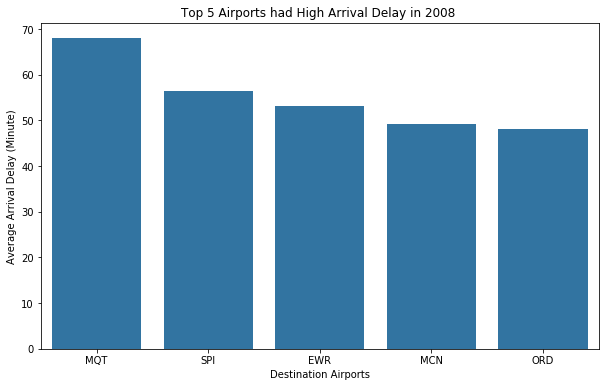

In [54]:
# plot the average arrival dela for the top 5 origins
plt.figure(figsize = [10, 6])
base_color = sb.color_palette()[0]
sb.barplot(data = Arrive_delay, x = 'Dest', y = 'Arriv_delay_average', color= base_color)
plt.xlabel('Destination Airports')
plt.ylabel('Average Arrival Delay (Minute)')
plt.title('Top 5 Airports had High Arrival Delay in 2008 ')

**Observation:**
> The following airports had the highest delay in arrival in 2008 in order:
- Marquette County Airport (MQT)
- Capital Airport (SPI)
- Newark Intl Airport (EWR)
- Middle Georgia Regional Airport (MCN)
- Chicago O'Hare International Airport (ORD)


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> In this section I explored the performance of the carriers in terms of on time arrival and departure. Also, I study the relationship between the delay in departure and delay in arrival and found a positive relationship. I investigate the reasons that made ORD airport had the highest number of cancellations by studey the cancellation code and month factors and whether there is a relationship between these factor that cause the cancellations. I explored the distributiion of average departure delay among months in 2008. I explored the airports that had high delay in arrival and departure.

### Results Summary:
- (AQ, HA, 9E) are the carrieres with high performance in terms of on time arrival and departure.
- There is a postive relationship between arrival delay and departure delay
- The peak of the delay in the departure were in February, June, and December. The whether and holiday might played role in the delay but they are not very related as the delay was variant among winter months and holidays.
- Chicago O'Hare International Airport (ORD) had alot of cancellation in Februray due to (B:weather) first and then (C:National Aviation System (NAS)).October month came as the least month in terms of cancellation. 
- The following airports had the highest delay in departure in 2008 in order:Houghton County Memorial (CMX),Pellston Regional of Emmet County (PLN),Capital (SPI),Hilton Head (HHH),Marquette County Airport (MQT)
- The following airports had the highest delay in arrival in 2008 in order:Marquette County Airport (MQT),Capital Airport (SPI),Newark Intl Airport (EWR),Middle Georgia Regional Airport (MCN),Chicago O'Hare International Airport (ORD)

## Multivariate Exploration

> In this section I will create plots of three or more variables to investigate the relationship between them. 

### What are the main causes for delays in all months in 2008?  

Lets see what is the major cause for delay in arrival that was trend in 2008

In [34]:
# create datafram for each type of the delay contains the average delay per month
Carrier_delay=df_2008.query('Cancelled==0 and CarrierDelay>0').groupby('Month')['CarrierDelay'].mean().reset_index(name='Carrier_delay_average')
Weather_delay=df_2008.query('Cancelled==0 and WeatherDelay>0').groupby('Month')['WeatherDelay'].mean().reset_index(name='Weather_delay_average')
NAS_delay=df_2008.query('Cancelled==0 and NASDelay>0').groupby('Month')['NASDelay'].mean().reset_index(name='NAS_delay_average')
Security_delay=df_2008.query('Cancelled==0 and SecurityDelay>0').groupby('Month')['SecurityDelay'].mean().reset_index(name='Security_delay_average')
LateAircraft_delay=df_2008.query('Cancelled==0 and LateAircraftDelay>0').groupby('Month')['LateAircraftDelay'].mean().reset_index(name='LateAircraft_delay_average')


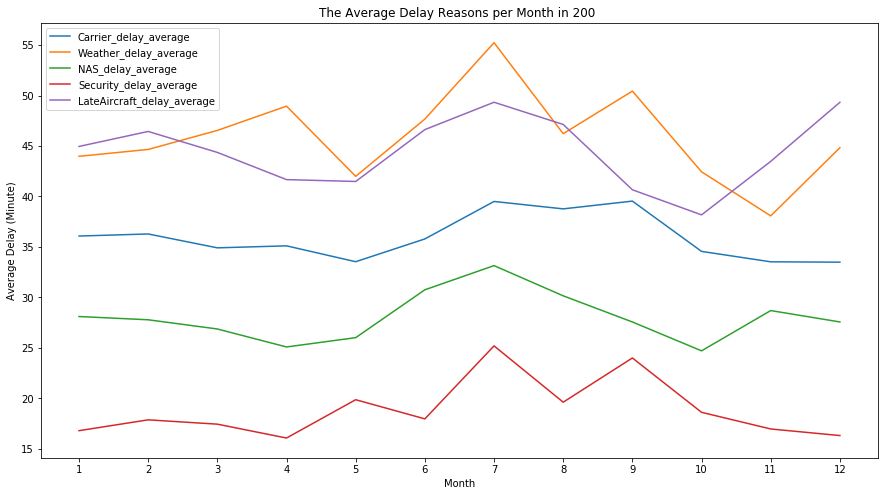

In [35]:
# create line chart for each type
plt.figure(figsize = [15, 8])
plt.errorbar(data = Carrier_delay, x = 'Month', y = 'Carrier_delay_average' )
plt.errorbar(data = Weather_delay, x = 'Month', y = 'Weather_delay_average' )
plt.errorbar(data = NAS_delay, x = 'Month', y = 'NAS_delay_average' )
plt.errorbar(data = Security_delay, x = 'Month', y = 'Security_delay_average' )
plt.errorbar(data = LateAircraft_delay, x = 'Month', y = 'LateAircraft_delay_average' )
plt.xticks(Carrier_delay.Month)
plt.xlabel('Month')
plt.ylabel('Average Delay (Minute)')
plt.title('The Average Delay Reasons per Month in 2008 ')
plt.legend()

**Observation:**
> Obviously, whether and late aircraft delay were the maon causes for arrival delay among all months in 2008.

### For which destination airports the carrier (AA , OH) had the most arrival delay? Are they related to top 5 destinations?

As carrier (AA , OH) have the high percentage in terms of delay arrival as we see in the previous section, lets investigate in which destination airports the delay occured more for these carries, and whether they are from top 5 airports with high arrival delay that shown in the previous section. 

In [36]:
# create dataframe for each carrier contains the arrival delay per destination
AA_carrier=df_2008.query('Cancelled==0 and ArrDelay>0 and UniqueCarrier in("AA" ) ').groupby(['UniqueCarrier','Dest'])['ArrDelay'].mean().reset_index(name='Arrv_delay_average').sort_values('Arrv_delay_average', ascending=False).head(10) 
OH_carrier=df_2008.query('Cancelled==0 and ArrDelay>0 and UniqueCarrier in("OH" ) ').groupby(['UniqueCarrier','Dest'])['ArrDelay'].mean().reset_index(name='Arrv_delay_average').sort_values('Arrv_delay_average', ascending=False).head(10)
carrier_delay=pd.concat([AA_carrier, OH_carrier], ignore_index=True)

Text(0.5, 1.0, 'The Destinations with High Arrival Delay for AA and OH Carrier ')

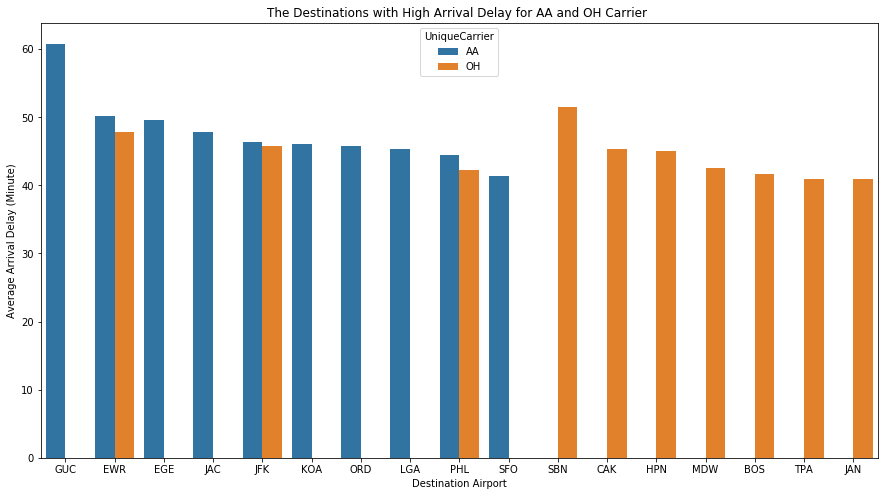

In [55]:
# plot the destinations with high arrival delay for AA and OH carrier
plt.figure(figsize = [15, 8])
sb.barplot(data=carrier_delay,x="Dest", y="Arrv_delay_average",hue= 'UniqueCarrier')
plt.xlabel('Destination Airport')
plt.ylabel('Average Arrival Delay (Minute)')
plt.title('The Destinations with High Arrival Delay for AA and OH Carrier ')

**Observation:**
> AA carrier had the most arrival delay to GUC airport, while OH carrier had the most arrival delay to SBN, EWR airport is common in delay for both carrier. The results are not related to the top 5 destination that had delay in arrival except EWR. This might lead to say that the most delays that made EWR to be within top 5 airports was from AA and OH carrier.

### From which origin airports the carrier (WN , CO) had the most departure delay? Are they related to top 5 origins?

As carrier (WN , CO) have the high percentage in terms of delay departure as we see in the previous section, lets investigate in which origin airports the delay occured more for these carries, and whether they are from top 5 airports with high departure delay that shown in the previous section to discover if these carriers contribute to the airports result.

In [58]:
# create dataframe for each carrier contains the departure delay per origin
WN_carrier=df_2008.query('Cancelled==0 and DepDelay>0 and UniqueCarrier in("WN" ) ').groupby(['UniqueCarrier','Origin'])['DepDelay'].mean().reset_index(name='departure_delay_average').sort_values('departure_delay_average', ascending=False).head(10) 
CO_carrier=df_2008.query('Cancelled==0 and DepDelay>0 and UniqueCarrier in("CO" ) ').groupby(['UniqueCarrier','Origin'])['DepDelay'].mean().reset_index(name='departure_delay_average').sort_values('departure_delay_average', ascending=False).head(10)
carrier_delay=pd.concat([WN_carrier, CO_carrier], ignore_index=True)

Text(0.5, 1.0, 'The Origins with High Departure Delay for WN and CO Carrier ')

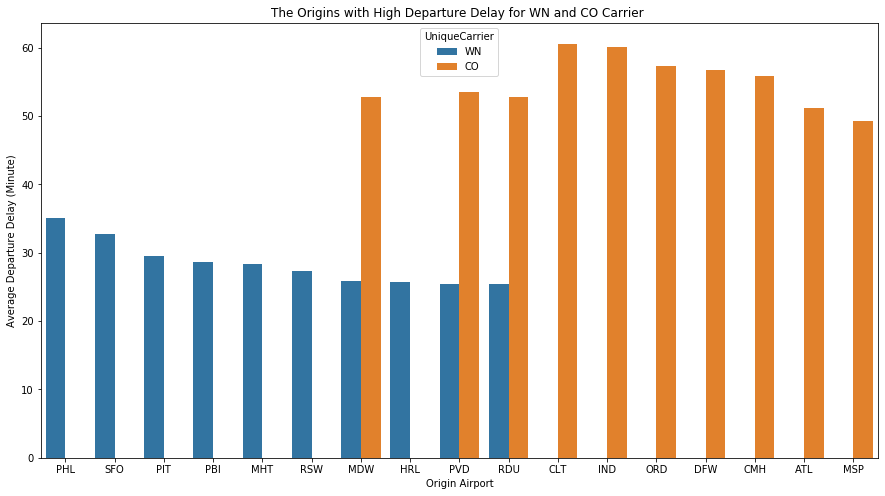

In [59]:
# plot the origin with high departure delay for WN and CO carrier
plt.figure(figsize = [15, 8])
sb.barplot(data=carrier_delay,x="Origin", y="departure_delay_average",hue= 'UniqueCarrier')
plt.xlabel('Origin Airport')
plt.ylabel('Average Departure Delay (Minute)')
plt.title('The Origins with High Departure Delay for WN and CO Carrier ')

**Observation:**
> WN carrier had the most departure delay from PHL airport, while CO carrier had the most departure delay from CLT airport. The output airports results are not related to the top 5 airports that had delay in departure. 


### Is the weather impact on the departure time average of top 5 origin airports?

After we got the top 5 airports have departure delay, lets check if the delays appeared in specific months so that we can discover if the weather impact the departure delay for the top 5 origin airports.

In [19]:
# Create datafram for each airport to calculate the average of the departure delay per month
df_CMX=df_2008.query('Cancelled==0 and DepDelay>0 and Origin=="CMX" ').groupby( 'Month')['DepDelay'].mean().reset_index(name='CMX_delay_average')
df_PLN=df_2008.query('Cancelled==0 and DepDelay>0 and Origin=="PLN" ').groupby( 'Month' )['DepDelay'].mean().reset_index(name='PLN_delay_average') 
df_SPI=df_2008.query('Cancelled==0 and DepDelay>0 and Origin=="SPI" ').groupby([ 'Month'])['DepDelay'].mean().reset_index(name='SPI_delay_average') 
df_HHH=df_2008.query('Cancelled==0 and DepDelay>0 and Origin=="HHH" ').groupby([ 'Month'])['DepDelay'].mean().reset_index(name='HHH_delay_average') 
df_MQT=df_2008.query('Cancelled==0 and DepDelay>0 and Origin=="MQT" ').groupby([ 'Month'])['DepDelay'].mean().reset_index(name='MQT_delay_average')

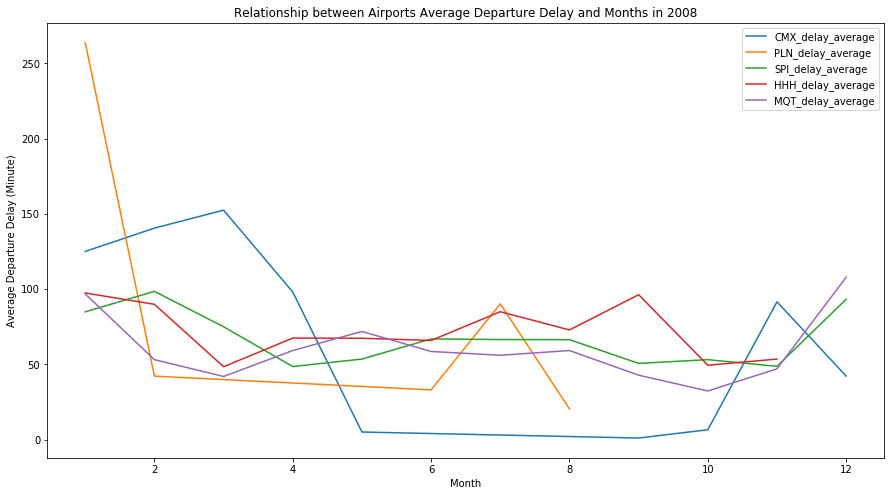

In [26]:
# plot the departure delay average of the airports to see if the the most delay occurred in specific seasons
plt.figure(figsize = [15, 8])
plt.errorbar(data = df_CMX, x = 'Month',y = 'CMX_delay_average' )
plt.errorbar(data = df_PLN, x = 'Month', y = 'PLN_delay_average' )
plt.errorbar(data = df_SPI, x = 'Month', y = 'SPI_delay_average' )
plt.errorbar(data = df_HHH, x = 'Month', y = 'HHH_delay_average' )
plt.errorbar(data = df_MQT, x = 'Month', y = 'MQT_delay_average' )
#tick=['1','2','3','4','5','6','7','8','9','10','11','12']
#plt.xticks(df_CMX.Month+1)
#plot.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12'])
plt.xlabel('Month')
plt.ylabel('Average Departure Delay (Minute)')
plt.title('Relationship between Airports Average Departure Delay and Months in 2008')
plt.legend()

**Observation:**
> We can see that the average departure delay of each airport is vary from month to month. In other words, we can't say there a specific months or season where the most delays of all airports occuer. So, There is no relationship between weather and departure delay.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> In this section I studied the relationship between average delay and delay reasons to check the trend reason. Also, I explored the airports where the bad performance carrier had its delayin to check whether those carriers contributed to the  delay in departure and arrival of the top 5 airports that had. I studied the relationship between departure time average of top 5 origin airports and whether and it shown that they not very related.  

### Results Summary:
-  Weather and late aircraft delay were the main causes for arrival delay among all months in 2008.
- The most delays that made EWR to be within top 5 airports was from AA and OH carrier. 
- WN carrier had the most departure delay from PHL airport, while CO carrier had the most departure delay from CLT airport. The output airports results are not related to the top 5 airports that had delay in departure.
- There is no relationship between whether and departure delay